Debayan Datta BDA

# Logistic Regression

In [14]:
import numpy as np
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

In [15]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [16]:
class logisticRegression():

    def __init__(self, lr=0.001, n_iters=1000):  #lr means learning rate
        self.lr = lr
        self.n_iter = n_iters
        self.weight = None
        self.bias = None

    def fit(self, X, y):
        n_samples,n_features = X.shape
        print(n_samples)
        self.weight = np.zeros(n_features)
        self.bias=0
        
        for i in range(self.n_iter):

            linear_pred = np.dot(X,self.weight) + self.bias     # wT*x + b
            predictions = sigmoid(linear_pred)

            dw = (1.0/n_samples) * np.dot(X.T, (predictions - y))

            db = (1.0/n_samples) * np.sum((predictions-y))

            self.weight = self.weight - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weight) + self.bias
        y_pred = sigmoid(linear_pred)
        return [0 if y < 0.5 else 1 for y in y_pred]



Import Dataset from sklearn

In [17]:
from sklearn import datasets
bc=datasets.load_breast_cancer()

In [18]:
X,y = bc.data,bc.target

print(X[0])
print(y[0])

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
0


### Spliting the data

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

### Model defined above (from scratch)

In [21]:
lr = logisticRegression()

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

455


In [22]:
def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test) / len(y_test)

In [23]:
acc=accuracy(y_pred,y_test)
print(acc)

0.9385964912280702


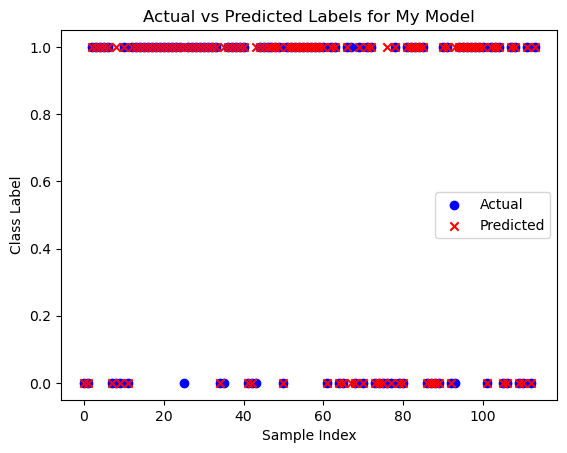

In [24]:
import matplotlib.pyplot as plt

plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', color='red', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('Actual vs Predicted Labels for My Model')
plt.legend()
plt.show()

#### SKlearn Model

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [26]:
sklearn_lr = LogisticRegression()
sklearn_lr.fit(X_train, y_train)
y_pred_sklearn = sklearn_lr.predict(X_test)
acc_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(acc_sklearn)

0.9473684210526315


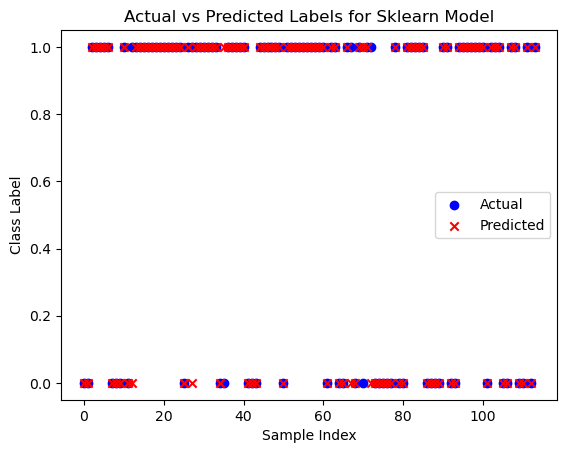

In [27]:
import matplotlib.pyplot as plt
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue')
plt.scatter(range(len(y_pred_sklearn)), y_pred_sklearn, label='Predicted', color='red', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('Actual vs Predicted Labels for Sklearn Model')
plt.legend()
plt.show()